In [75]:
import numpy as np
import pandas as pd

In [76]:
df = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\bank churn\resources\analytical_base_table.csv")

In [77]:
X = df.drop(['Exited'],axis=1)
y= df['Exited']

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [92]:

dt_model = joblib.load(r"models/dtree.pkl")
rf_model = joblib.load(r"models/rforest_model.pkl")
lr_model = joblib.load(r"models/log_model.pkl")
xgb_model = joblib.load(r"models/xgb_model.pkl")
knn_model = joblib.load(r"models/knn_model.pkl")
svc_model = joblib.load(r"models/svc_model.pkl")
loaded_models = {
    'Decision Tree': dt_model,
    'K-Nearest Neighbors': knn_model,
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Support Vector Classifier':svc_model
}

In [95]:
from sklearn.metrics import roc_auc_score,precison_score,recall_score,f1_score,accuracy

ImportError: cannot import name 'precison_score' from 'sklearn.metrics' (c:\Users\dell\OneDrive\Desktop\bank churn\virtualenv\Lib\site-packages\sklearn\metrics\__init__.py)

In [100]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
)
import pandas as pd

def evaluation(loaded_models, X_test, y_test):
    results = []
    for name, bundle in loaded_models.items():
        model = bundle['model']
        threshold = bundle['threshold']

        probs = model.predict_proba(X_test)[:, 1]
        preds = (probs >= threshold).astype(int)

        results.append([
            name,
            precision_score(y_test, preds),
            recall_score(y_test, preds),
            f1_score(y_test, preds),
            accuracy_score(y_test, preds),
            roc_auc_score(y_test, probs)
        ])
       
    eval_df = pd.DataFrame(results, columns=[
        'model', 'precision', 'recall', 'f1_macro', 'accuracy', 'roc_auc'
    ])
    eval_df.set_index('model', inplace=True)
    return eval_df


In [101]:
evaluation(loaded_models,X_test,y_test)

,precision,recall,f1_macro,accuracy,roc_auc
model,,,,,
Decision Tree,0.497364,0.695332,0.579918,0.7950,0.842562
K-Nearest Neighbors,0.451155,0.624079,0.523711,0.7690,0.802002
Logistic Regression,0.513011,0.678133,0.584127,0.8035,0.838227
Random Forest,0.625000,0.614251,0.619579,0.8465,0.861826
XGBoost,0.602804,0.633907,0.617964,0.8405,0.863904
Support Vector Classifier,0.594848,0.624079,0.609113,0.8370,0.855149


In [119]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_all_models_with_cm_report(loaded_models, X_test, y_test, target_names=None, normalize=True):
    for model_name, bundle in loaded_models.items():
        model = bundle['model']
        threshold = bundle.get('threshold', 0.5)

        # Predict with threshold
        probs = model.predict_proba(X_test)[:, 1]
        preds = (probs >= threshold).astype(int)

        print(f"\n🔍 Model: {model_name}")
        print("=" * (len(model_name) *5))

        # Raw Confusion Matrix
        print("\nConfusion Matrix:")
        raw_cm = confusion_matrix(y_test, preds)
        raw_df = pd.DataFrame(raw_cm, index=target_names, columns=target_names)
        plt.figure(figsize=(6,4))
        sns.heatmap(raw_df,annot=True,fmt='d',cmap='Blues')
        plt.title(f'{model_name} - Confusion Matrix (Raw)')
        plt.ylabel('True Labels')
        plt.xlabel('Predicted Labels')
        plt.show()
        # Normalized Confusion Matrix
        if normalize:
            print("\nNormalized Confusion Matrix (by True Labels):")
            norm_cm = confusion_matrix(y_test, preds, normalize='true')
            norm_df = pd.DataFrame(norm_cm, index=target_names, columns=target_names)
            sns.heatmap(norm_df,annot=True,cmap='Greens',fmt='.2f')
            plt.title(f'{model_name} - Confusion Matrix (Normalized)')
            plt.ylabel('True Labels')
            plt.xlabel('Predicted Labels')
            plt.show()
        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_test, preds, target_names=target_names))



🔍 Model: Decision Tree

Confusion Matrix:


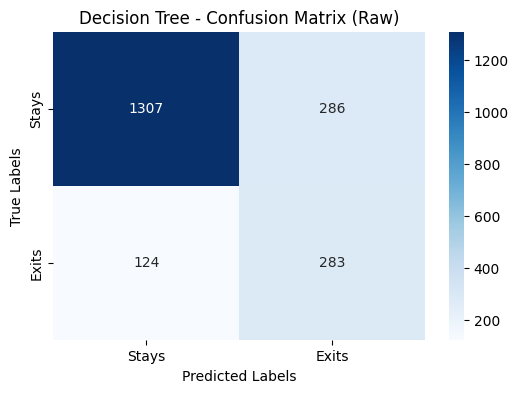


Normalized Confusion Matrix (by True Labels):


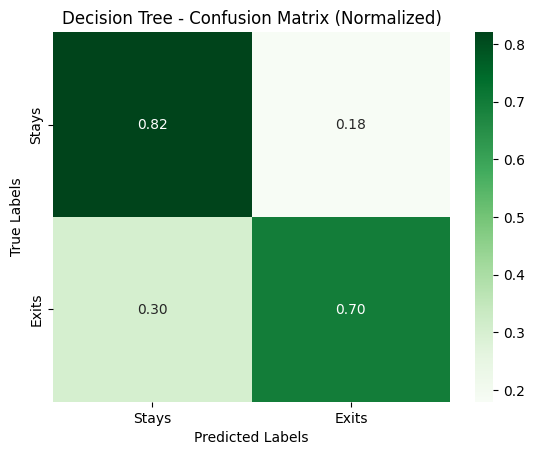


Classification Report:
              precision    recall  f1-score   support

       Stays       0.91      0.82      0.86      1593
       Exits       0.50      0.70      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.72      2000
weighted avg       0.83      0.80      0.81      2000


🔍 Model: K-Nearest Neighbors

Confusion Matrix:


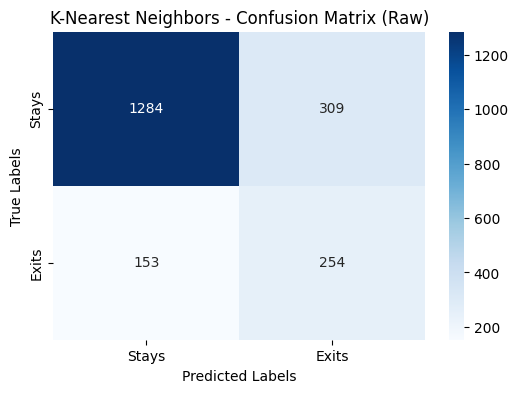


Normalized Confusion Matrix (by True Labels):


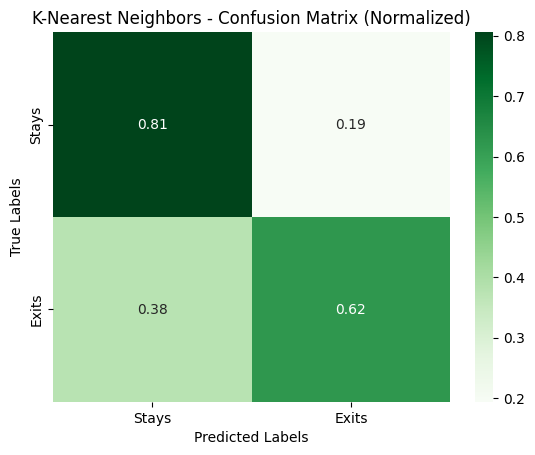


Classification Report:
              precision    recall  f1-score   support

       Stays       0.89      0.81      0.85      1593
       Exits       0.45      0.62      0.52       407

    accuracy                           0.77      2000
   macro avg       0.67      0.72      0.69      2000
weighted avg       0.80      0.77      0.78      2000


🔍 Model: Logistic Regression

Confusion Matrix:


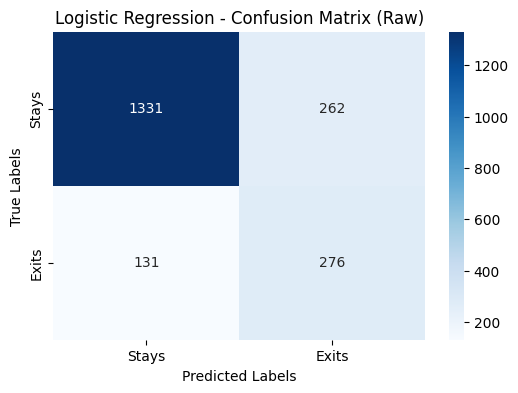


Normalized Confusion Matrix (by True Labels):


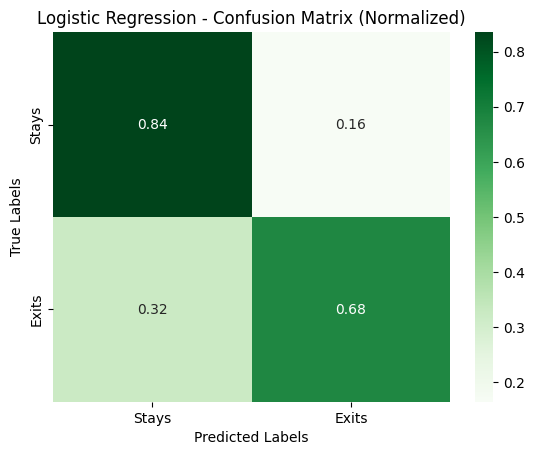


Classification Report:
              precision    recall  f1-score   support

       Stays       0.91      0.84      0.87      1593
       Exits       0.51      0.68      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000


🔍 Model: Random Forest

Confusion Matrix:


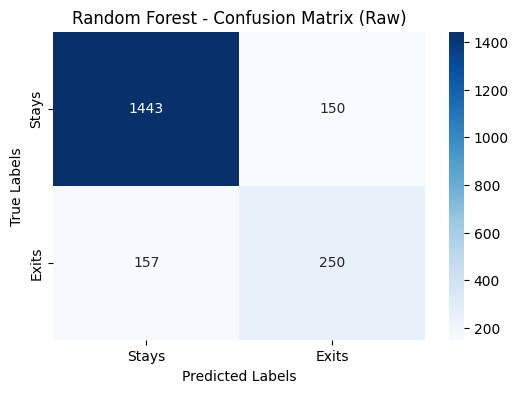


Normalized Confusion Matrix (by True Labels):


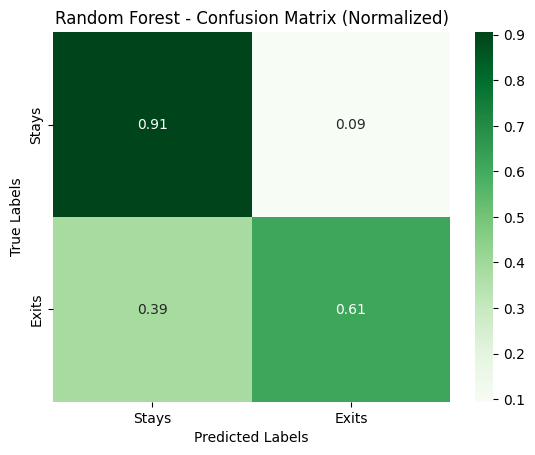


Classification Report:
              precision    recall  f1-score   support

       Stays       0.90      0.91      0.90      1593
       Exits       0.62      0.61      0.62       407

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000


🔍 Model: XGBoost

Confusion Matrix:


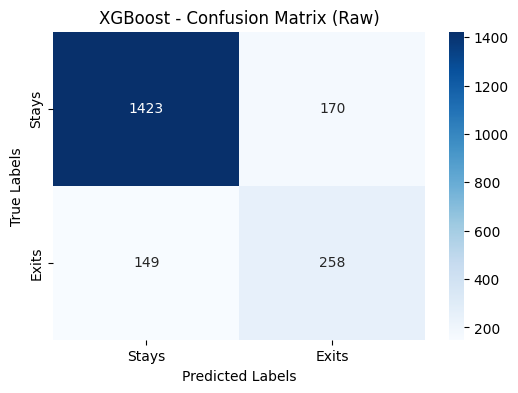


Normalized Confusion Matrix (by True Labels):


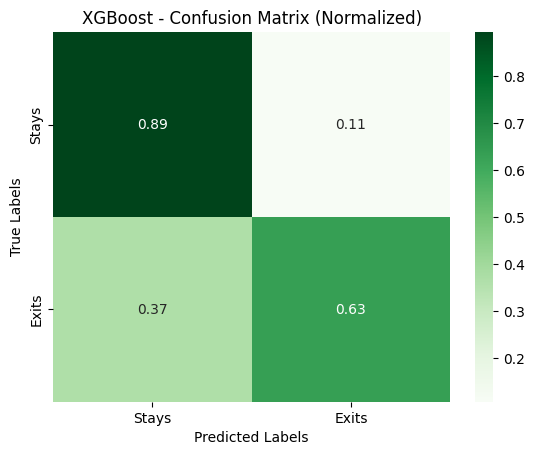


Classification Report:
              precision    recall  f1-score   support

       Stays       0.91      0.89      0.90      1593
       Exits       0.60      0.63      0.62       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000


🔍 Model: Support Vector Classifier

Confusion Matrix:


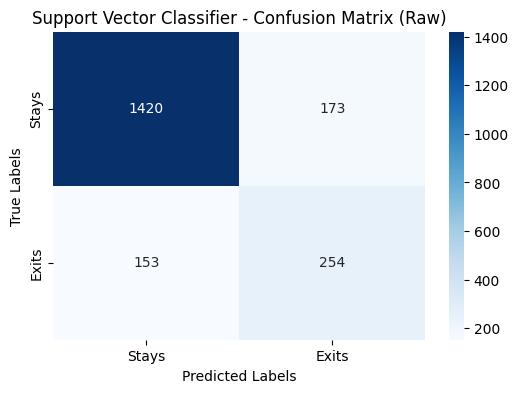


Normalized Confusion Matrix (by True Labels):


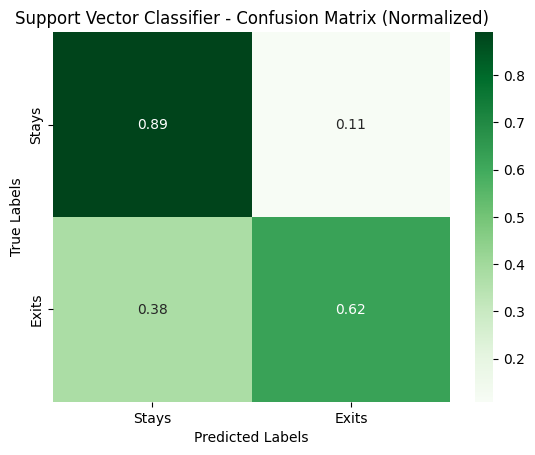


Classification Report:
              precision    recall  f1-score   support

       Stays       0.90      0.89      0.90      1593
       Exits       0.59      0.62      0.61       407

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [120]:
target_names = ['Stays', 'Exits']
evaluate_all_models_with_cm_report(
    loaded_models=loaded_models,
    X_test=X_test,
    y_test=y_test,
    target_names=['Stays', 'Exits'],
    normalize=True  # Set to False if you only want raw confusion matrix
)
